# Heatmap: H-bonds between residues

Input file: hbond_heatmap.csv

Format:

X,Y,Value

A-BGLC1, A-BGLC1,    1110.00000000    

A-BGLC1, A-BGLC2,    0.00000000    

A-BGLC1, A-BMAN3,    0.00000000    

A-BGLC1, A-AMAN4,    0.00000000
 
...

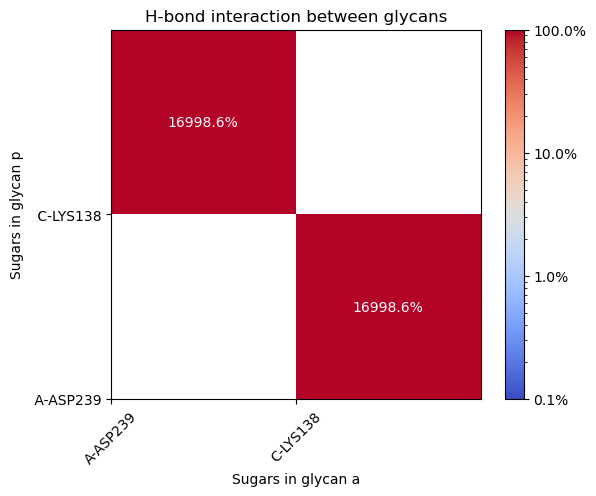

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LogNorm
from matplotlib.ticker import ScalarFormatter

# Read data from the CSV file
input_file = 'data/hbond_heatmap.csv'

data = pd.read_csv(input_file)

# Extract X, Y, and Value columns from the data
X_labels = data['X']
Y_labels = data['Y']
Z = data['Value'].values.reshape(len(X_labels.unique()), -1)

min_value = 0.001
max_value = 1.0
# Create the heatmap with the 'cividis' colormap
fig, ax = plt.subplots()
heatmap = ax.imshow(Z.T, cmap='coolwarm', extent=[0, len(X_labels.unique()), 0, len(Y_labels.unique())], origin='lower', norm=LogNorm(vmin=min_value, vmax=max_value))

# Set custom tick labels for X and Y axes
ax.set_xticks(range(len(X_labels.unique())))
ax.set_xticklabels(X_labels.unique(), rotation=45)
ax.set_yticks(range(len(Y_labels.unique())))
ax.set_yticklabels(Y_labels.unique(), position=(0,0))

# Add colorbar
cbar = plt.colorbar(heatmap)
#cbar.set_label('Data Values (Log Scale)')

# Set the color bar tick labels in a linear scale
cbar.formatter = ScalarFormatter()
cbar.update_ticks()

# Add labels and title
plt.xlabel('Sugars in glycan ' + input_file[-6])
plt.ylabel('Sugars in glycan ' + input_file[-5])
plt.title('H-bond interaction between glycans')


# Calculate cell center positions
x_positions = np.arange(len(X_labels.unique())) + 0.5
y_positions = np.arange(len(Y_labels.unique())) + 0.5

# Add text annotations to the center of each box with percentage formatting
for j, y in enumerate(y_positions):
    for i, x in enumerate(x_positions):
        value = Z[i, j]
        if value > 0.0:
            percentage_value = Z[i, j] * 100  # Convert the value to a percentage with two decimal places
            text = ax.text(x, y, f'{percentage_value:.1f}%', ha="center", va="center", color="w")

# Define a function for formatting color bar ticks as percentages
def percentage_formatter(x, pos):
    return f'{x*100:.1f}%'

# Set the color bar tick formatter to display percentages
cbar.ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Export the plot into .png
plt.savefig('hbond_heatmap_AC.png')

# Show the plot
plt.show()


# Histogram per H-bond: horizontal bars

Input file: hbond_hbarplot.dat

Format:

A-BGLC1-O11...C-BGLC1-H19   26.4347134

A-BGLC1-O5...C-BGLC2-H27   3.41931605

A-BGLC1-O18...C-BGLC2-H27   3.99920009E-02

A-BGLC1-O26...C-BGLC2-H27   34.9130173

...

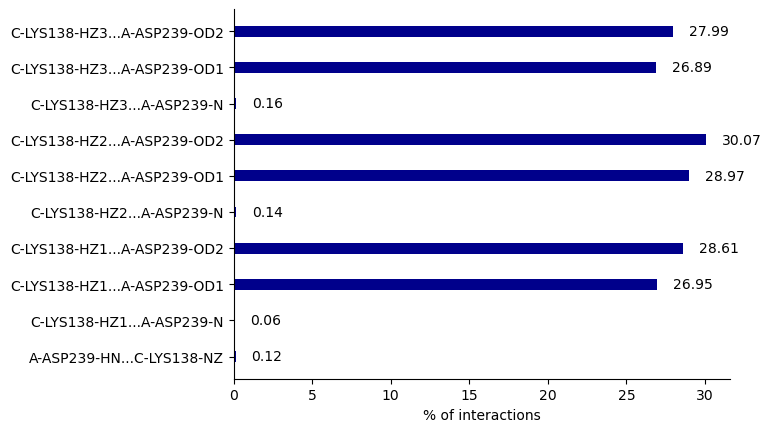

In [29]:
import matplotlib.pyplot as plt

# Read data from the file
file_path = 'data/hbond_hbarplot.dat' # interactions 

categories = []
values = []

with open(file_path, 'r') as file:
    for line in file:
        # Extract the label and value parts
        parts = line.split()
        label = ' '.join(parts[:-1])  # Join all parts except the last one
        value_str = parts[-1]

        # Skip empty lines
        if not label or not value_str:
            continue

        categories.append(label)
        values.append(float(value_str))

# Set a maximum width for the bars
max_bar_width = 0.3
        
# Create a horizontal bar plot
bars = plt.barh(categories, values, color='darkblue', height=max_bar_width)

# Add labels and title
plt.xlabel('% of interactions')
#plt.ylabel('H-bond: Donnor...Hydrogen')
#plt.title('Horizontal Bar Plot')

# Remove upper and right spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Add values as labels next to the bars
label_offset = 1.0  # Adjust the horizontal offset as needed
for bar, value in zip(bars, values):
    plt.text(bar.get_width() + label_offset, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center')

# Display the plot
plt.show()


# Distance & angles versus time



%contact_dist : 1.5596880623875222   %contact_angl : 56.32873425314937   %contact_dist & angl : 0.7192178585559484
%contact_dist : 12.31753649270146   %contact_angl : 40.57188562287543   %contact_dist & angl : 6.379149701974499
%contact_dist : 80.5638872225555   %contact_angl : 38.07238552289542   %contact_dist & angl : 19.25210702540343
%contact_dist : 81.30373925214957   %contact_angl : 39.312137572485504   %contact_dist & angl : 19.856666964479444
%contact_dist : 13.237352529494101   %contact_angl : 42.251549690061985   %contact_dist & angl : 6.858628274345131
%contact_dist : 80.90381923615277   %contact_angl : 39.95200959808039   %contact_dist & angl : 20.450803456330014
%contact_dist : 81.98360327934414   %contact_angl : 41.211757648470304   %contact_dist & angl : 20.930282028700642
%contact_dist : 11.557688462307539   %contact_angl : 40.23195360927814   %contact_dist & angl : 6.003905601858352
%contact_dist : 79.36412717456508   %contact_angl : 36.67266546690662   %contact_dist &

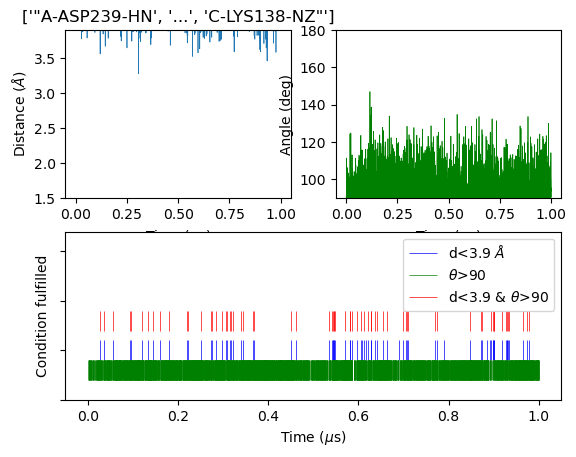

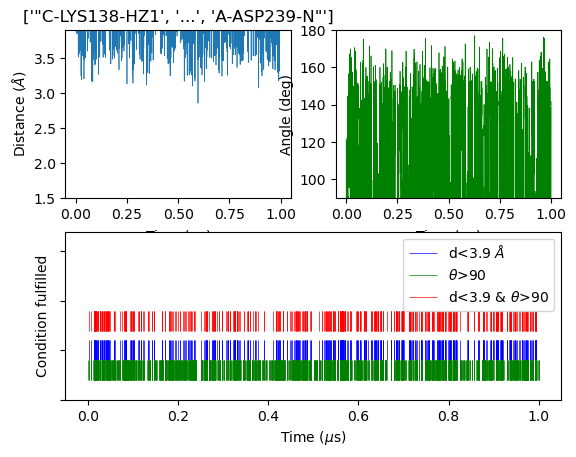

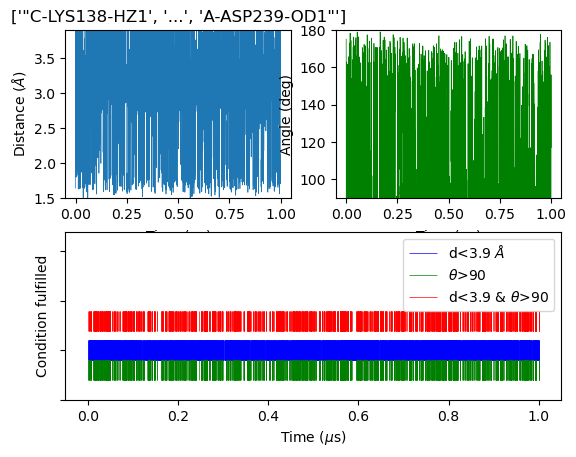

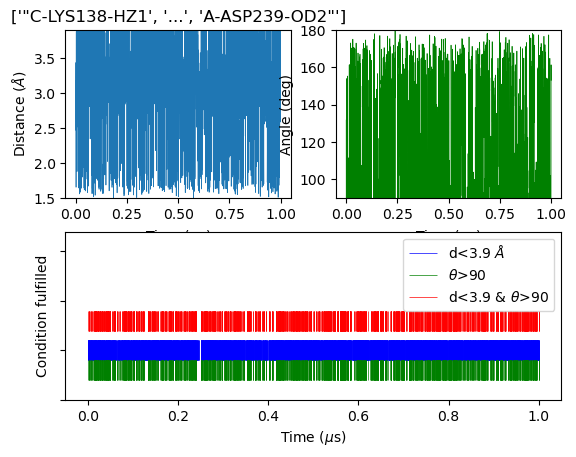

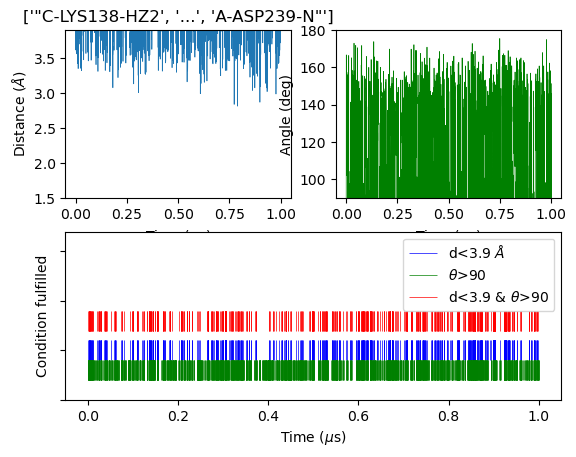

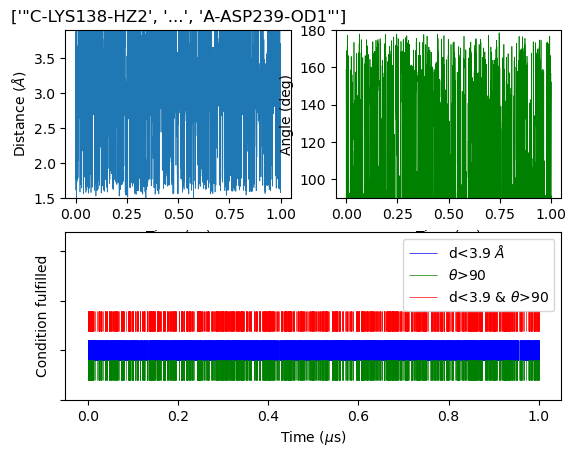

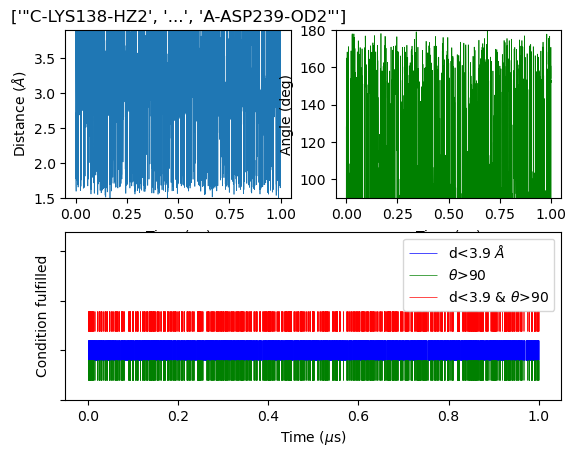

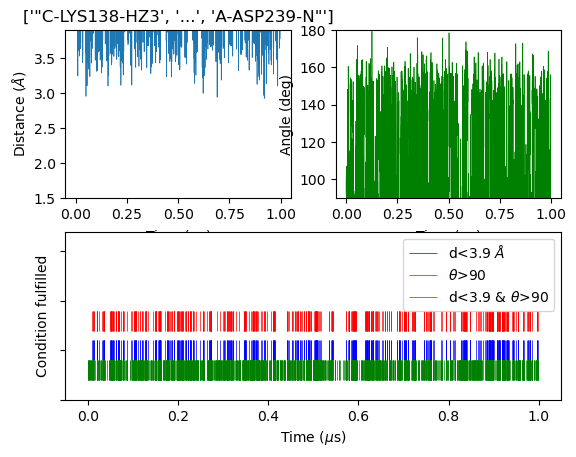

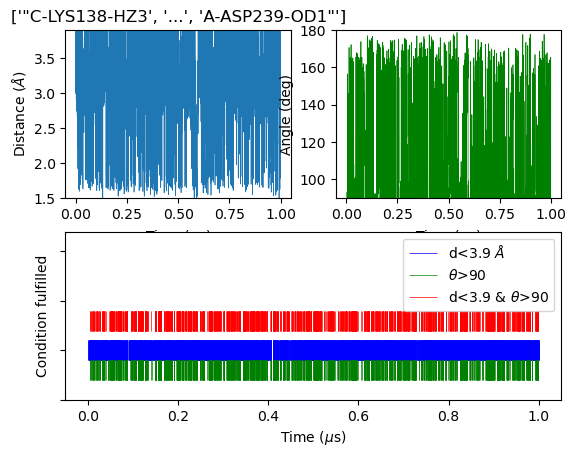

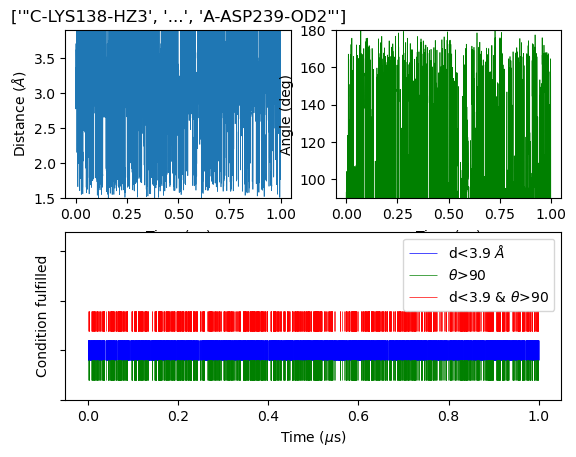

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Read data from the file
file_path_dist = 'data/hbond_lengthTime.dat' # distances
file_path_angl = 'data/hbond_angleTime.dat' # angles
time=[]
dist=[]
distance_all=[]
angl=[]
angle_all=[]
categories=[]
dist_cutoff_time=[]
angl_cutoff_time=[]
distangl_cutoff_time=[]
dist_cutoff=3.9
angl_cutoff=90

# Extract distances
with open(file_path_dist, 'r') as file:    
    for line in file:
        parts = line.split()
        if not parts:
                continue
        if parts[0]=='@':
            categories.append(parts[3:6])
        
        if parts[0]!='@' :  
            if parts[0]=='&':
                distance_all.append(dist)
                dist=[]
                continue
            dist.append(float(parts[1]))              # distances

# Extract Angles
with open(file_path_angl, 'r') as file:    
    for line in file:
        parts = line.split()
        if not parts:
                continue        
        if parts[0]!='@' :  
            if parts[0]=='&':
                angle_all.append(angl)
                angl=[]
                continue
            angl.append(float(parts[1]))              # Angles      

# timestep in mus
dt=200/1000000
time = np.arange(0, len(distance_all[0]), 1)*dt

# distance and angular cutoff condition with time
for i in np.arange(0,len(distance_all),1):
    dist=np.array(distance_all[i])
    angl=np.array(angle_all[i])
    dist1=np.where(dist < dist_cutoff,0.95,0)
    angl1=np.where(angl > angl_cutoff,0.93,0)
    dist_and_angl=np.abs(dist1+angl1)
    distangl1=np.where(dist_and_angl > 1,.98,0)
    
    dist_cutoff_time.append(dist1)
    angl_cutoff_time.append(angl1)
    distangl_cutoff_time.append(distangl1)
    #distangl_cutoff_time.append(np.where(dist_and_angl > 1,.98,0))
    contact_dist=100*np.sum(dist1)/.95/5001
    contact_angl=100*np.sum(angl1)/.93/5001
    contact_distangl=100*np.sum(distangl1)/(.93+.95)/5001
    
    print("%contact_dist :", contact_dist, "  %contact_angl :", contact_angl, "  %contact_dist & angl :", contact_distangl)

    
# plot results
for i in np.arange(0,len(distance_all),1):
    #if values[i]>1:                                 #only distance interaction  >1%
        
        ax1 = plt.subplot(221)
        ax1.plot(time,distance_all[i],linewidth=.5)
        ax1.set_xlabel("Time ($\mu$s)")
        ax1.set_ylabel("Distance ($\AA$)")
        ax1.set_title(categories[i])
        ax1.set_ylim(1.5, dist_cutoff)

        ax2 = plt.subplot(222)
        ax2.plot(time,angle_all[i],linewidth=.5,color='g')
        ax2.set_xlabel("Time ($\mu$s)")
        ax2.set_ylabel("Angle (deg)")  
        ax2.set_ylim(angl_cutoff, 180)

        
        ax3 = plt.subplot(212)
        #ax3.scatter(time,dist_cutoff_time[i],marker="|")
        #ax3.scatter(time,angl_cutoff_time[i],marker="|",color='g')
        ax3.vlines(time, ymin= dist_cutoff_time[i]- 0.01, ymax=dist_cutoff_time[i] + 0.01, color='b', linewidth=.5)
        ax3.vlines(time, ymin= angl_cutoff_time[i]- 0.01, ymax=angl_cutoff_time[i] + 0.01, color='g', linewidth=.5)
        ax3.vlines(time, ymin= distangl_cutoff_time[i]- 0.01, ymax=distangl_cutoff_time[i] + 0.01, color='r', linewidth=.5)
        
        ax3.set_ylim(0.9, 1.07)
        #ax3.set_xlim(.66,.7)
        ax3.set_xlabel("Time ($\mu$s)")
        ax3.set_ylabel("Condition fulfilled")
        ax3.legend(["d<" + str(dist_cutoff)+" $\AA$","$\\theta$>"+str(angl_cutoff),"d<" + str(dist_cutoff)+" & $\\theta$>"+str(angl_cutoff) ])    
        ax3.set_yticklabels([])
        plt.show()       
